# Backward Prediction, Forward Prediction and Interpolation With Noise Free Data Using Jointly Gaussian Vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data length
D = 100
# set the seed
the_seed = 347
# random vector generator
rng = np.random.default_rng(seed=the_seed)
# mean of the multivariate Gaussian under the data
mean = np.zeros(D)
# covariance of the multivariate Gaussian under the data
cov = np.identity(D)
# data sampled from the multivariate Gaussian
x = rng.multivariate_normal(mean, cov, size=1)
# data reshaped to a column vector
x = np.reshape(x, (D, -1))
# matrix L construction
L = np.zeros((D-2, D))
j = 0
for i in range(0, D-2):
    L[i, j:j+3] = np.array([-1, 2, -1])
    j += 1
L = L / 2
# smoothness factor
the_lambda = 0.01

## First Case: Backward Prediction 

In [3]:
from scipy.linalg import pinv2
# the start index of the vector x2
future_start = 4
# x2 is created
x2 = x[future_start:, :]
# L1 and L2 are created
L1 = L[:, 0:future_start]
L2 = L[:, future_start:]
# x1 is estimated
lambda11 = the_lambda * np.matmul(L1.T, L1)
lambda12 = the_lambda * np.matmul(L1.T, L2)
x1_est = -np.matmul(np.matmul(pinv2(lambda11), lambda12), x2)

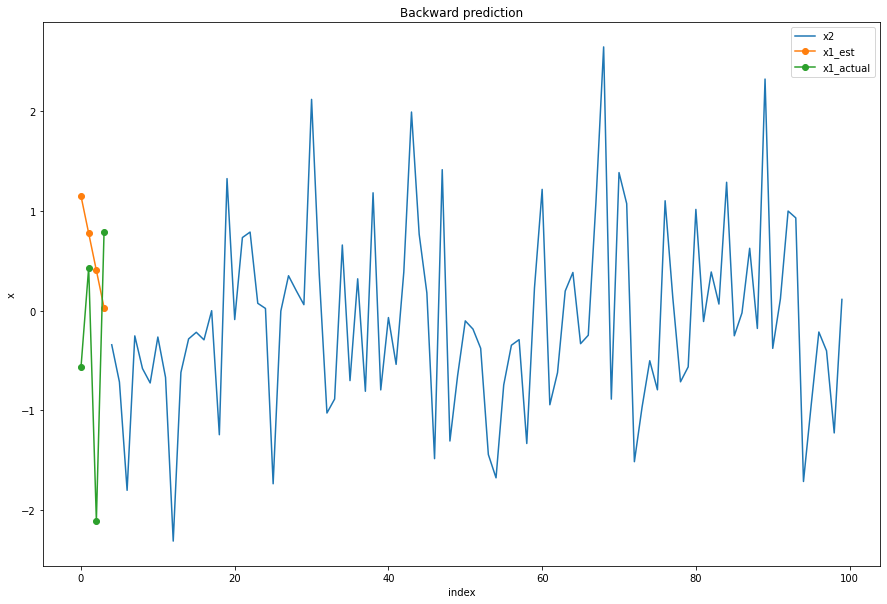

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(np.arange(future_start, D), x2, label='x2')
_ = ax.plot(np.arange(0, future_start), x1_est, '-o', label='x1_est')
_ = ax.plot(np.arange(0, future_start), x[0:future_start, 0], '-o', label='x1_actual')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Backward prediction')
_ = plt.xlabel('index')
_ = plt.ylabel('x')

## Second Case: Forward Prediction

In [5]:
# number of predictions to be made
num_forward_predictions = 4
# rearrangement of the columns of L
column_indices = np.concatenate((np.arange(D-num_forward_predictions, D), np.arange(0, D-num_forward_predictions)))
# L matrix for the forward prediction is created
L_forward = the_lambda * L[:, column_indices]
# x2 is created
x2 = x[0:-num_forward_predictions]
# L1 and L2 are created
L1 = L_forward[:, 0:num_forward_predictions]
L2 = L_forward[:, num_forward_predictions:]
# x1 is estimated
lambda11 = the_lambda * np.matmul(L1.T, L1)
lambda12 = the_lambda * np.matmul(L1.T, L2)
x1_est = -np.matmul(np.matmul(pinv2(lambda11), lambda12), x2)

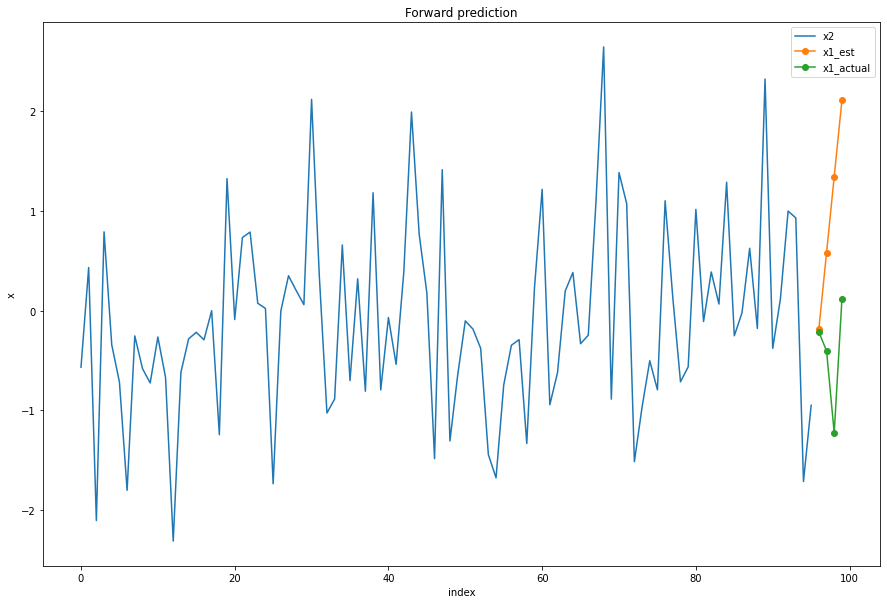

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(np.arange(0, D-num_forward_predictions), x2, label='x2')
_ = ax.plot(np.arange(D-num_forward_predictions, D), x1_est, '-o', label='x1_est')
_ = ax.plot(np.arange(D-num_forward_predictions, D), x[D-num_forward_predictions:, 0], '-o', label='x1_actual')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Forward prediction')
_ = plt.xlabel('index')
_ = plt.ylabel('x')

## Third Case: Interpolation

In [7]:
num_interpolations = 28
np.random.seed(298457)
column_indices = np.random.permutation(D)
L_interpolation = the_lambda * L[:, column_indices]
# x2 is created
x2 = x[column_indices[num_interpolations:]]
# L1 and L2 are created
L1 = L_interpolation[:, 0:num_interpolations]
L2 = L_interpolation[:, num_interpolations:]
# x1 is estimated
lambda11 = the_lambda * np.matmul(L1.T, L1)
lambda12 = the_lambda * np.matmul(L1.T, L2)
x1_est = -np.matmul(np.matmul(pinv2(lambda11), lambda12), x2)

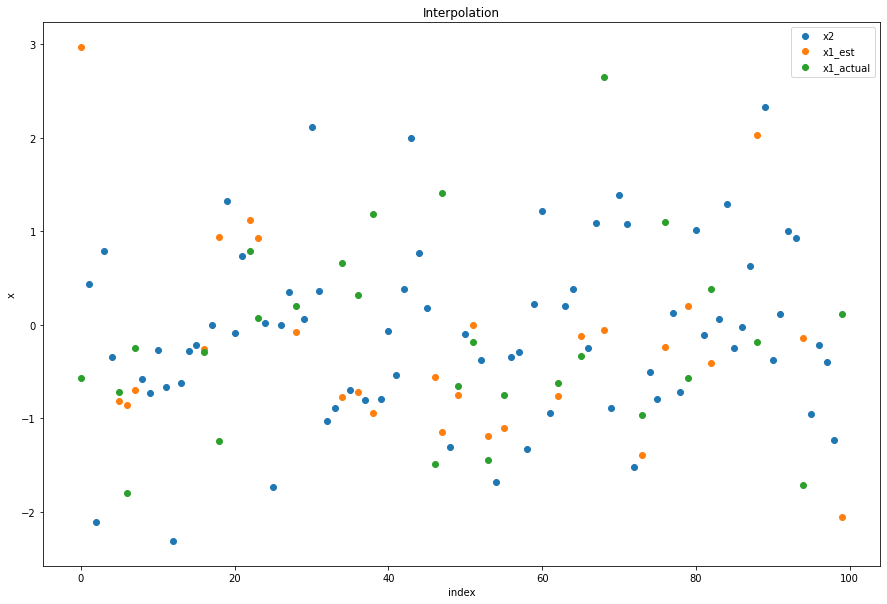

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(column_indices[num_interpolations:], x2, 'o', label='x2')
_ = ax.plot(column_indices[0:num_interpolations], x1_est, 'o', label='x1_est')
_ = ax.plot(column_indices[0:num_interpolations], x[column_indices[0:num_interpolations], 0], 'o', label='x1_actual')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Interpolation')
_ = plt.xlabel('index')
_ = plt.ylabel('x')

## Conclusion
All of the algorithm and the numerical results depend on the assumption that the posterior is proper although the prior is improper. Another assumption is that the inverses are assumed to exist although they cannot be formally defined. Hence, the numerical results must be examined with these assumptions in mind. The coefficient $\lambda$ does not have any effect on the MAP estimate. However, it affects our uncertainty about the MAP estimate. The interpolation results are more successful than the prediction results.

## References

Machine Learning A Probabilistic Perspective, Kevin P. Murphy.

Gaussian Markov Random Fields Theory and Applications, Havard Rue and Leonhard Held.

Lecture 5: Intrinsic GMRFs by David Bolin, <http://www.math.chalmers.se/~bodavid/GMRF2015/Lectures/F5slides.pdf>

<https://github.com/probml/pmtk3/blob/master/demos/gaussInterpDemo.m>

Backward Prediction Forward Prediction And Interpolation With Noise Free Data Using Jointly Gaussian Vectors, <https://saffetgokcensen.github.io/blog/2020/08/26/backward-prediction-forward-prediction-and-interpolation-with-noise-free-data-using-jointly-gaussian-vectors>